# Control of camera

**Author**: Luis Miguel Sánchez Brea

**Date**:  2018/12/12

**Objective**: 

Test for camera control.

There is a posibility to get a window for live video (is_life=True) or get only images when required (is_life=False).

The camera is controlled using  tisgrabber.py module.
The functions can be seen at this module. 

Creo que saqué este modulo de aquí:
https://github.com/samuellab/mindcontrol/blob/master/3rdPartyLibs/tisgrabber.h

Otra posibilidad a estudiar:
https://github.com/morefigs/py-ic-imaging-control

$\int f(x) = \frac{\omega - \pi}{3}$

## Configuration

In [1]:
%run ../config_slm.ipynb

In [2]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

import time
import cv2

In [19]:
import py_slm.camera.tisgrabber as IC

In [45]:
# Create the camera object.
Camera = IC.TIS_CAM()

In [46]:
# List availabe devices as uniqe names. This is a combination of camera name and serial number
Devices = Camera.GetDevices()
for i in range(len(Devices)):
    print(str(i) + " : " + str(Devices[i]))

0 : DMx 72BUC02 14210296


In [47]:
Camera.open("DMx 72BUC02 14210296")
# Set a video format
#Camera.SetVideoFormat("Y800 (2592x1944)")
Camera.SetVideoFormat("Y800 (1024x768)")

#Set a frame rate of 30 frames per second
Camera.SetFrameRate(5)

1

In [50]:
Camera.SetPropertySwitch("Gain", "Auto", 0)
Camera.SetPropertyValue("Gain", "Value", 25)

1

In [51]:
seconds=2

value=int(np.log2(seconds))
print(value)

1


In [52]:
Camera.SetPropertyValue("Exposure", "Value", value)

1

In [53]:
is_life = False

if is_life is True:
    Camera.StartLive(1)
else:
    Camera.StartLive(0)

In [43]:
#Dialog with properties
Camera.ShowPropertyDialog()

(0, 0)


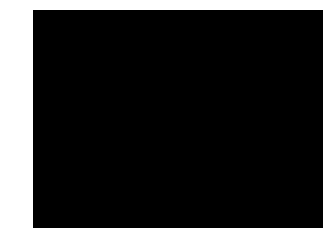

In [55]:
Camera.SnapImage()
# Get the image
image = Camera.GetImage()

plt.figure()
plt.imshow(image)
plt.axis('off');

print(image.max(), image.min())

## Manual Camera control
The properties of the camera can be controlled manually

In [56]:
Camera.SetPropertySwitch("Gain", "Auto", 0)
Camera.SetPropertyValue("Gain", "Value", 25)
Camera.SnapImage()

# Get the image
image2 = Camera.GetImage()

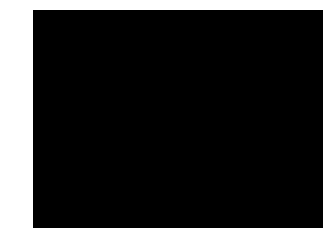

In [57]:
plt.figure()
plt.imshow(image2)
plt.axis('off')
plt.savefig('test_image.png')

In [37]:
Camera.StopLive()

0